In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [53]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Survived','Age','Fare','Parch','SibSp'])

In [54]:
df

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [55]:
df['Family']=df['Parch']+df['SibSp']

In [56]:
df

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
888,0,NaN,1,2,23.4500,3
889,1,26.0,0,0,30.0000,0


In [57]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [58]:
df

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,3
889,1,26.0,30.0000,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Family    891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [60]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
Family       0.00000
dtype: float64

In [61]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
x_train.isnull().mean()

Age       0.199037
Fare      0.000000
Family    0.000000
dtype: float64

In [64]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

In [65]:
x_train['age_mean']=x_train['Age'].fillna(mean_age)
x_train['age_median']=x_train['Age'].fillna(median_age)

In [66]:
x_train

,Age,Fare,Family,age_mean,age_median
445,4.0,81.8583,2,4.000000,4.0
650,NaN,7.8958,0,29.256353,28.0
172,1.0,11.1333,2,1.000000,1.0
450,36.0,27.7500,3,36.000000,36.0
314,43.0,26.2500,2,43.000000,43.0
...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0
270,NaN,31.0000,0,29.256353,28.0
860,41.0,14.1083,2,41.000000,41.0
435,14.0,120.0000,3,14.000000,14.0


In [67]:
print(f'orginal age variable variance {x_train['Age'].var()}')
print(f'variance after mean imputation {x_train['age_mean'].var()}')
print(f'variance after median imputation {x_train['age_median'].var()}')

orginal age variable variance 211.95188064643307
variance after mean imputation 169.69780797736954
variance after median imputation 169.94984651902135


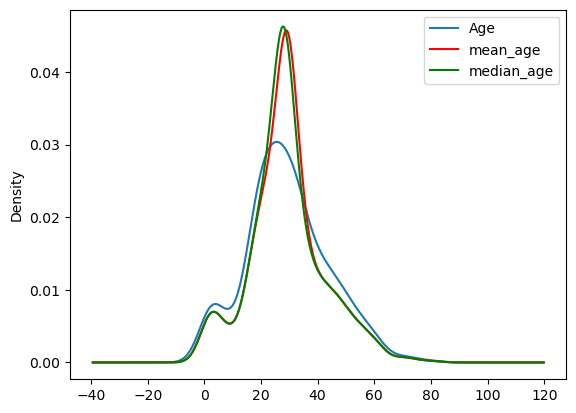

In [68]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde',label='Age',ax=ax)
# age mean distribution
x_train['age_mean'].plot(kind='kde',color='r',label='mean_age',ax=ax)
# age median distributuon
x_train['age_median'].plot(kind='kde',color='g',label='median_age',ax=ax)

plt.legend(loc='best')

In [69]:
x_train.cov()

,Age,Fare,Family,age_mean,age_median
Age,211.951881,75.274254,-6.932603,211.951881,211.951881
Fare,75.274254,2603.792658,18.193818,60.267811,63.061388
Family,-6.932603,18.193818,2.997027,-5.550541,-5.533529
age_mean,211.951881,60.267811,-5.550541,169.697808,169.697808
age_median,211.951881,63.061388,-5.533529,169.697808,169.949847


In [70]:
x_train.corr()

,Age,Fare,Family,age_mean,age_median
Age,1.000000,0.094097,-0.310167,1.000000,1.000000
Fare,0.094097,1.000000,0.205956,0.090666,0.094798
Family,-0.310167,0.205956,1.000000,-0.246123,-0.245186
age_mean,1.000000,0.090666,-0.246123,1.000000,0.999258
age_median,1.000000,0.094798,-0.245186,0.999258,1.000000


<Axes: >

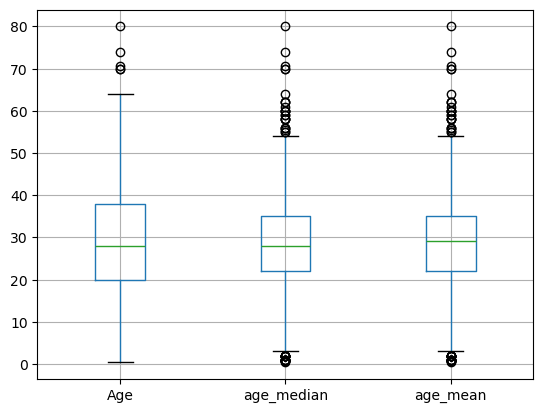

In [71]:
x_train[['Age','age_median','age_mean']].boxplot()

# using sklearn simple imputer

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [73]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')


In [75]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Age'])
],remainder='passthrough')

In [76]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [77]:
trf.fit(x_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [78]:
trf.named_transformers_['imputer1'].statistics_

array([29.25635271])

In [79]:
trf.named_transformers_['imputer2'].statistics_

array([28.])

In [80]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [81]:
x_train

array([[  4.        ,   4.        ,  81.8583    ,   2.        ],
       [ 29.25635271,  28.        ,   7.8958    ,   0.        ],
       [  1.        ,   1.        ,  11.1333    ,   2.        ],
       ...,
       [ 41.        ,  41.        ,  14.1083    ,   2.        ],
       [ 14.        ,  14.        , 120.        ,   3.        ],
       [ 21.        ,  21.        ,  77.2875    ,   1.        ]])

In [82]:
# for arbitary
# imputer1=simpleImputer(strategy='constant',fill_value=99)